In [1]:
# Necessary libraries
import os
import re
import numpy as np
import pandas as pd
from keras import Sequential
from keras.layers import Dense,Flatten,InputLayer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils
import keras 
import imageio
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Reading the data
train=pd.read_csv('agedetectiontrain/train.csv')

# Image resizing of train data into single numpy array
temp=[]
for img_name in train.ID:
    img_path=os.path.join('agedetectiontrain/Train',img_name)
    img=imageio.imread(img_path)
    img=np.array(Image.fromarray(img).resize((32,32))).astype('float32')
    temp.append(img)
    
train_x=np.stack(temp)

# Normalizing the images
train_x=train_x/255.0

# Encoding the categorical variable to numeric
lb=LabelEncoder()
train_y=lb.fit_transform(train.Class)
train_y=utils.to_categorical(train_y)

# Specifying all the parameters we will be using in our network
input_num_units=(32,32,3)
hidden_num_units=500
output_num_units=3

epochs=100
batch_size=128

In [3]:
# Defining the network
model=Sequential([InputLayer(input_shape=input_num_units),
                 Flatten(),
                 Dense(units=hidden_num_units,activation='relu'),
                 Dense(units=output_num_units,activation='softmax')])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### We are going to focus on the following five optimization algorithms:

SGD

Adagrad

Adadelta

RMSprop

Adam

In [4]:
def model_with_different_optimizers(list_of_optimizers):
    for i in range(len(list_of_optimizers)):
        model.compile(loss='categorical_crossentropy',
                     optimizer=list_of_optimizers[i],
                     metrics=['accuracy'])
        # Traning the model and writing log files for TensorBoard in distinct directories        
        val=re.search('optimizers\..*\so',
                     str(list_of_optimizers[i])).group(0)[11:][:-2]
        logdir=r'optims\\'+val
        cb=keras.callbacks.TensorBoard(log_dir=logdir,write_graph=False)
        print('Building model using '+val+'optimizer')
        history=model.fit(train_x,train_y,epochs=epochs,validation_split=0.2,callbacks=[cb])
        print('Model built Sucessfully.')
        print('')
    
# Listing the optimizers
optims=[keras.optimizers.Adam(),keras.optimizers.Adadelta(),
       keras.optimizers.Adagrad(),keras.optimizers.RMSprop(),
       keras.optimizers.SGD()]
# Calling the function
model_with_different_optimizers(optims)

Building model using adam.Adamoptimizer
Epoch 1/100


498/498 [==============================] - 8s 14ms/step - loss: 0.9202 - accuracy: 0.5783 - val_loss: 0.8287 - val_accuracy: 0.6185
Epoch 2/100
498/498 [==============================] - 7s 13ms/step - loss: 0.8357 - accuracy: 0.6103 - val_loss: 0.8149 - val_accuracy: 0.6271
Epoch 3/100
498/498 [==============================] - 7s 13ms/step - loss: 0.8163 - accuracy: 0.6226 - val_loss: 0.7946 - val_accuracy: 0.6364
Epoch 4/100
498/498 [==============================] - 7s 14ms/step - loss: 0.7943 - accuracy: 0.6370 - val_loss: 0.7882 - val_accuracy: 0.6497
Epoch 5/100
498/498 [==============================] - 7s 14ms/step - loss: 0.7837 - accuracy: 0.6431 - val_loss: 0.7759 - val_accuracy: 0.6469
Epoch 6/100
498/498 [==============================] - 7s 13ms/step - loss: 0.7755 - accuracy: 0.6473 - val_loss: 0.7856 - val_accuracy: 0.6394
Epoch 7/100
498/498 [==============================] - 7s 14ms/step - loss: 0.7673 - accuracy:

498/498 [==============================] - 10s 20ms/step - loss: 0.4697 - accuracy: 0.8060 - val_loss: 0.7677 - val_accuracy: 0.6954
Epoch 11/100
498/498 [==============================] - 10s 20ms/step - loss: 0.4691 - accuracy: 0.8068 - val_loss: 0.7677 - val_accuracy: 0.6951
Epoch 12/100
498/498 [==============================] - 10s 20ms/step - loss: 0.4686 - accuracy: 0.8075 - val_loss: 0.7676 - val_accuracy: 0.6951
Epoch 13/100
498/498 [==============================] - 10s 20ms/step - loss: 0.4682 - accuracy: 0.8076 - val_loss: 0.7677 - val_accuracy: 0.6956
Epoch 14/100
498/498 [==============================] - 10s 20ms/step - loss: 0.4679 - accuracy: 0.8076 - val_loss: 0.7677 - val_accuracy: 0.6946
Epoch 15/100
498/498 [==============================] - 10s 20ms/step - loss: 0.4676 - accuracy: 0.8078 - val_loss: 0.7677 - val_accuracy: 0.6944
Epoch 16/100
498/498 [==============================] - 10s 20ms/step - loss: 0.4673 - accuracy: 0.8079 - val_loss: 0.7677 - val_accuracy

Epoch 22/100
498/498 [==============================] - 8s 15ms/step - loss: 0.4581 - accuracy: 0.8133 - val_loss: 0.7770 - val_accuracy: 0.6956
Epoch 23/100
498/498 [==============================] - 8s 16ms/step - loss: 0.4580 - accuracy: 0.8123 - val_loss: 0.7774 - val_accuracy: 0.6961
Epoch 24/100
498/498 [==============================] - 7s 15ms/step - loss: 0.4578 - accuracy: 0.8126 - val_loss: 0.7772 - val_accuracy: 0.6956
Epoch 25/100
498/498 [==============================] - 7s 15ms/step - loss: 0.4578 - accuracy: 0.8130 - val_loss: 0.7779 - val_accuracy: 0.6966
Epoch 26/100
498/498 [==============================] - 7s 15ms/step - loss: 0.4577 - accuracy: 0.8127 - val_loss: 0.7782 - val_accuracy: 0.6956
Epoch 27/100
498/498 [==============================] - 8s 15ms/step - loss: 0.4576 - accuracy: 0.8125 - val_loss: 0.7783 - val_accuracy: 0.6966
Epoch 28/100
498/498 [==============================] - 7s 15ms/step - loss: 0.4575 - accuracy: 0.8127 - val_loss: 0.7783 - val_ac

498/498 [==============================] - 7s 14ms/step - loss: 0.5036 - accuracy: 0.7823 - val_loss: 0.9010 - val_accuracy: 0.6544
Epoch 35/100
498/498 [==============================] - 7s 14ms/step - loss: 0.5017 - accuracy: 0.7857 - val_loss: 0.8717 - val_accuracy: 0.6939
Epoch 36/100
498/498 [==============================] - 7s 14ms/step - loss: 0.5034 - accuracy: 0.7872 - val_loss: 0.9183 - val_accuracy: 0.6914
Epoch 37/100
498/498 [==============================] - 7s 14ms/step - loss: 0.5009 - accuracy: 0.7869 - val_loss: 0.9429 - val_accuracy: 0.6843
Epoch 38/100
498/498 [==============================] - 7s 14ms/step - loss: 0.5042 - accuracy: 0.7877 - val_loss: 0.9044 - val_accuracy: 0.6477
Epoch 39/100
498/498 [==============================] - 7s 14ms/step - loss: 0.4977 - accuracy: 0.7908 - val_loss: 1.0914 - val_accuracy: 0.6213
Epoch 40/100
498/498 [==============================] - 7s 14ms/step - loss: 0.4967 - accuracy: 0.7898 - val_loss: 0.9125 - val_accuracy: 0.672

498/498 [==============================] - 4s 8ms/step - loss: 0.3610 - accuracy: 0.8515 - val_loss: 1.0976 - val_accuracy: 0.6818
Epoch 47/100
498/498 [==============================] - 4s 8ms/step - loss: 0.3609 - accuracy: 0.8506 - val_loss: 1.0843 - val_accuracy: 0.6833
Epoch 48/100
498/498 [==============================] - 4s 8ms/step - loss: 0.3614 - accuracy: 0.8511 - val_loss: 1.1018 - val_accuracy: 0.6745
Epoch 49/100
498/498 [==============================] - 4s 8ms/step - loss: 0.3614 - accuracy: 0.8534 - val_loss: 1.0864 - val_accuracy: 0.6843
Epoch 50/100
498/498 [==============================] - 4s 8ms/step - loss: 0.3607 - accuracy: 0.8509 - val_loss: 1.0931 - val_accuracy: 0.6801
Epoch 51/100
498/498 [==============================] - 4s 8ms/step - loss: 0.3601 - accuracy: 0.8515 - val_loss: 1.1019 - val_accuracy: 0.6826
Epoch 52/100
498/498 [==============================] - 4s 8ms/step - loss: 0.3599 - accuracy: 0.8521 - val_loss: 1.0874 - val_accuracy: 0.6798
Epoch

### In this section, we are choosing 'linear', 'sigmoid', 'tanh', 'relu', and 'softmax' as the competing activation functions for the hidden layer. The code to build a model with each of these activation functions and saving the evaluation metrics which results in a directory named ‘activation’, is as shown below:

In [5]:
 def models_with_different_activation_fn(list_of_activation_fn):
    for i in range (len(list_of_activation_fn)):
        model=Sequential([
            InputLayer(input_shape=input_num_units),
            Flatten(),
            Dense(units=hidden_num_units,activation=list_of_activation_fn[i]),
            Dense(units=output_num_units,activation='softmax'),
        ])
        model.compile(loss='categorical_crossentropy',
                     optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
        logdir=r'activation\\'+list_of_activation_fn[i]
        cb=keras.callbacks.TensorBoard(log_dir=logdir,write_graph=False)
        print('Building model using '+list_of_activation_fn[i]+' activation function')
        history=model.fit(train_x,train_y,epochs=epochs,validation_split=0.2,
                         callbacks=[cb])
        print('Model build successfully')
        print('')
        
act=['linear','sigmoid','tanh','relu','softmax']
models_with_different_activation_fn(act)

Building model using linear activation function
Epoch 1/100
498/498 [==============================] - 13s 23ms/step - loss: 1.1811 - accuracy: 0.5531 - val_loss: 0.9540 - val_accuracy: 0.4980
Epoch 2/100
498/498 [==============================] - 10s 21ms/step - loss: 0.8580 - accuracy: 0.6020 - val_loss: 0.8412 - val_accuracy: 0.6107
Epoch 3/100
498/498 [==============================] - 10s 19ms/step - loss: 0.8306 - accuracy: 0.6173 - val_loss: 0.8001 - val_accuracy: 0.6306
Epoch 4/100
498/498 [==============================] - 8s 17ms/step - loss: 0.8237 - accuracy: 0.6196 - val_loss: 0.8748 - val_accuracy: 0.6020
Epoch 5/100
498/498 [==============================] - 8s 17ms/step - loss: 0.8208 - accuracy: 0.6203 - val_loss: 0.8027 - val_accuracy: 0.6361
Epoch 6/100
498/498 [==============================] - 8s 17ms/step - loss: 0.8209 - accuracy: 0.6224 - val_loss: 0.8225 - val_accuracy: 0.6328
Epoch 7/100
498/498 [==============================] - 8s 17ms/step - loss: 0.8211 - 

498/498 [==============================] - 9s 19ms/step - loss: 0.7157 - accuracy: 0.6857 - val_loss: 0.7577 - val_accuracy: 0.6527
Epoch 14/100
498/498 [==============================] - 9s 19ms/step - loss: 0.7094 - accuracy: 0.6891 - val_loss: 0.7134 - val_accuracy: 0.6866
Epoch 15/100
498/498 [==============================] - 9s 19ms/step - loss: 0.6973 - accuracy: 0.6952 - val_loss: 0.7182 - val_accuracy: 0.6926
Epoch 16/100
498/498 [==============================] - 9s 19ms/step - loss: 0.6899 - accuracy: 0.6973 - val_loss: 0.7292 - val_accuracy: 0.6788
Epoch 17/100
498/498 [==============================] - 9s 19ms/step - loss: 0.6825 - accuracy: 0.7034 - val_loss: 0.8830 - val_accuracy: 0.5992
Epoch 18/100
498/498 [==============================] - 9s 19ms/step - loss: 0.6826 - accuracy: 0.7052 - val_loss: 0.7130 - val_accuracy: 0.6914
Epoch 19/100
498/498 [==============================] - 9s 19ms/step - loss: 0.6871 - accuracy: 0.7032 - val_loss: 0.7297 - val_accuracy: 0.672

Epoch 25/100
498/498 [==============================] - 10s 20ms/step - loss: 0.7497 - accuracy: 0.6624 - val_loss: 0.7623 - val_accuracy: 0.6585
Epoch 26/100
498/498 [==============================] - 12s 24ms/step - loss: 0.7393 - accuracy: 0.6695 - val_loss: 0.7560 - val_accuracy: 0.6625
Epoch 27/100
498/498 [==============================] - 14s 29ms/step - loss: 0.7566 - accuracy: 0.6589 - val_loss: 0.7415 - val_accuracy: 0.6690
Epoch 28/100
498/498 [==============================] - 12s 23ms/step - loss: 0.7364 - accuracy: 0.6689 - val_loss: 0.8137 - val_accuracy: 0.6160
Epoch 29/100
498/498 [==============================] - 10s 20ms/step - loss: 0.7363 - accuracy: 0.6719 - val_loss: 0.7477 - val_accuracy: 0.6703
Epoch 30/100
498/498 [==============================] - 10s 21ms/step - loss: 0.7362 - accuracy: 0.6689 - val_loss: 0.7492 - val_accuracy: 0.6781
Epoch 31/100
498/498 [==============================] - 11s 22ms/step - loss: 0.7336 - accuracy: 0.6707 - val_loss: 0.8396 -

Epoch 37/100
498/498 [==============================] - 10s 20ms/step - loss: 0.5977 - accuracy: 0.7425 - val_loss: 0.7400 - val_accuracy: 0.6936
Epoch 38/100
498/498 [==============================] - 10s 20ms/step - loss: 0.5907 - accuracy: 0.7457 - val_loss: 0.7430 - val_accuracy: 0.6911
Epoch 39/100
498/498 [==============================] - 10s 19ms/step - loss: 0.5855 - accuracy: 0.7479 - val_loss: 0.7235 - val_accuracy: 0.6909
Epoch 40/100
498/498 [==============================] - 9s 19ms/step - loss: 0.5767 - accuracy: 0.7507 - val_loss: 0.7374 - val_accuracy: 0.6909
Epoch 41/100
498/498 [==============================] - 10s 20ms/step - loss: 0.5824 - accuracy: 0.7489 - val_loss: 0.7221 - val_accuracy: 0.7019
Epoch 42/100
498/498 [==============================] - 10s 20ms/step - loss: 0.5697 - accuracy: 0.7565 - val_loss: 0.7266 - val_accuracy: 0.6909
Epoch 43/100
498/498 [==============================] - 9s 19ms/step - loss: 0.5799 - accuracy: 0.7489 - val_loss: 0.7047 - v

Epoch 49/100
498/498 [==============================] - 10s 19ms/step - loss: 0.7515 - accuracy: 0.6767 - val_loss: 0.8233 - val_accuracy: 0.6228
Epoch 50/100
498/498 [==============================] - 9s 19ms/step - loss: 0.7570 - accuracy: 0.6747 - val_loss: 0.7755 - val_accuracy: 0.6632
Epoch 51/100
498/498 [==============================] - 9s 19ms/step - loss: 0.7539 - accuracy: 0.6745 - val_loss: 0.7940 - val_accuracy: 0.6577
Epoch 52/100
498/498 [==============================] - 9s 19ms/step - loss: 0.7503 - accuracy: 0.6769 - val_loss: 0.7802 - val_accuracy: 0.6557
Epoch 53/100
498/498 [==============================] - 9s 19ms/step - loss: 0.7478 - accuracy: 0.6776 - val_loss: 0.8176 - val_accuracy: 0.6517
Epoch 54/100
498/498 [==============================] - 9s 19ms/step - loss: 0.7478 - accuracy: 0.6807 - val_loss: 0.7925 - val_accuracy: 0.6472
Epoch 55/100
498/498 [==============================] - 9s 19ms/step - loss: 0.7413 - accuracy: 0.6833 - val_loss: 0.7712 - val_a

In [6]:
pip install keras==2.15.0

### First, we need to find the range of optimum learning rate which is extracted using the keras_lr_finder library by plotting the learning rate against the loss. The range where the learning rate decreases quite rapidly is chosen, as shown below:

Epoch 1/100
156/156 [==============================] - 3s 17ms/step - loss: 0.5039 - accuracy: 0.8239
Epoch 2/100
156/156 [==============================] - 3s 18ms/step - loss: 0.5030 - accuracy: 0.8242
Epoch 3/100
156/156 [==============================] - 3s 18ms/step - loss: 0.5022 - accuracy: 0.8240
Epoch 4/100
156/156 [==============================] - 3s 18ms/step - loss: 0.5016 - accuracy: 0.8235
Epoch 5/100
156/156 [==============================] - 3s 18ms/step - loss: 0.5010 - accuracy: 0.8236
Epoch 6/100
156/156 [==============================] - 3s 18ms/step - loss: 0.5005 - accuracy: 0.8238
Epoch 7/100
156/156 [==============================] - 3s 17ms/step - loss: 0.5001 - accuracy: 0.8240
Epoch 8/100
156/156 [==============================] - 3s 18ms/step - loss: 0.4997 - accuracy: 0.8243
Epoch 9/100
156/156 [==============================] - 3s 18ms/step - loss: 0.4993 - accuracy: 0.8245
Epoch 10/100
156/156 [==============================] - 3s 18ms/step - loss: 0.499

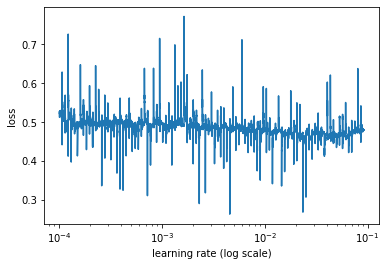

In [7]:
import keras_lr_finder as lr_find 
lr_finder = lr_find.LRFinder(model)
lr_finder.find(train_x, train_y, start_lr=0.0001, end_lr=0.09, batch_size=batch_size, epochs=epochs)
lr_finder.plot_loss(n_skip_beginning=20, n_skip_end=5)

Epoch 1/5
32/32 [==============================] - 4s 81ms/step - loss: 0.3462 - accuracy: 0.8593 - val_loss: 1.1357 - val_accuracy: 0.6733
Epoch 2/5
32/32 [==============================] - 2s 70ms/step - loss: 0.3452 - accuracy: 0.8610 - val_loss: 1.1403 - val_accuracy: 0.6793
Epoch 3/5
32/32 [==============================] - 2s 69ms/step - loss: 0.3455 - accuracy: 0.8596 - val_loss: 1.1471 - val_accuracy: 0.6796
Epoch 4/5
32/32 [==============================] - 2s 69ms/step - loss: 0.3456 - accuracy: 0.8596 - val_loss: 1.1372 - val_accuracy: 0.6791
Epoch 5/5
32/32 [==============================] - 2s 68ms/step - loss: 0.3464 - accuracy: 0.8583 - val_loss: 1.1342 - val_accuracy: 0.6836


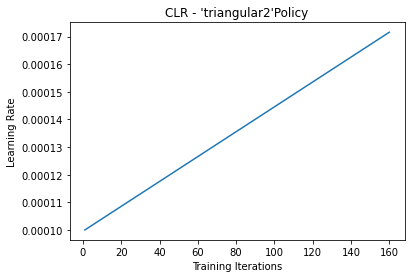

In [8]:
# Importing cyclic learning rate module
from clr_callback.clr_callback import CyclicLR
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
# Pass the values of base_lr with the value of 
cb_triangular = CyclicLR(base_lr=0.0001, max_lr=0.001,
                         step_size=2000., mode='triangular2')
# Setting callback for model
cb_save=TensorBoard(log_dir='learning_rate',
                                  write_graph=False)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=500, epochs=5, validation_split=0.2, callbacks=[cb_triangular, cb_save], verbose=1)

plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - 'triangular2'Policy")
plt.plot(cb_triangular.history['iterations'], cb_triangular.history['lr']) 

### Here, we are going to use four different variations in weights, 'Random', 'Glorot', 'He', and 'Orthogonal' and compare their performance:

In [9]:
def weight_initializer(list_of_weights,init_weight_names):
    for weight_init in range(len(list_of_weights)):
        model=Sequential([
            InputLayer(input_shape=input_num_units),
            Flatten(),
            Dense(units=hidden_num_units,
                 kernel_initializer=list_of_weights[weight_init],activation='softmax'),
            Dense(units=output_num_units,kernel_initializer=list_of_weights[weight_init],activation='relu')
        ])
        model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(),
                      metrics=['accuracy']
                     )
        logdir=r'weights\\'+init_weight_names[weight_init]
        cb=keras.callbacks.TensorBoard(log_dir=logdir,write_graph=False)
        print('Model Building using '+ init_weight_names[weight_init]+' Initializer')
        history = model.fit(train_x, train_y, epochs=epochs, 
                           validation_split=0.2,
                           callbacks=[cb])
        print('Built model successfully.')
        print('')
# Listing the weights
list_of_weights = [keras.initializers.RandomNormal(), keras.initializers.glorot_normal(), 
                    keras.initializers.he_normal(), keras.initializers.Orthogonal()]
init_weight_names = ['Random', 'Glorot', 'He', 'Orthogonal']
# Calling the function
weight_initializer(list_of_weights, init_weight_names)

Model Building using Random Initializer
Epoch 1/100
498/498 [==============================] - 10s 18ms/step - loss: 0.9321 - accuracy: 0.5715 - val_loss: 0.9321 - val_accuracy: 0.4972
Epoch 2/100
498/498 [==============================] - 8s 17ms/step - loss: 0.8662 - accuracy: 0.5956 - val_loss: 0.8590 - val_accuracy: 0.6178
Epoch 3/100
498/498 [==============================] - 9s 18ms/step - loss: 0.8717 - accuracy: 0.5990 - val_loss: 0.8552 - val_accuracy: 0.6188
Epoch 4/100
498/498 [==============================] - 9s 17ms/step - loss: 0.8641 - accuracy: 0.6056 - val_loss: 0.8468 - val_accuracy: 0.6158
Epoch 5/100
498/498 [==============================] - 8s 17ms/step - loss: 0.8575 - accuracy: 0.6190 - val_loss: 0.9023 - val_accuracy: 0.5573
Epoch 6/100
498/498 [==============================] - 8s 16ms/step - loss: 0.8656 - accuracy: 0.6174 - val_loss: 0.8361 - val_accuracy: 0.6276
Epoch 7/100
498/498 [==============================] - 8s 17ms/step - loss: 0.8555 - accuracy: 

Epoch 14/100
498/498 [==============================] - 8s 16ms/step - loss: nan - accuracy: 0.5425 - val_loss: nan - val_accuracy: 0.5439
Epoch 15/100
498/498 [==============================] - 8s 16ms/step - loss: nan - accuracy: 0.5425 - val_loss: nan - val_accuracy: 0.5439
Epoch 16/100
498/498 [==============================] - 8s 17ms/step - loss: nan - accuracy: 0.5425 - val_loss: nan - val_accuracy: 0.5439
Epoch 17/100
498/498 [==============================] - 8s 16ms/step - loss: nan - accuracy: 0.5425 - val_loss: nan - val_accuracy: 0.5439
Epoch 18/100
498/498 [==============================] - 8s 17ms/step - loss: nan - accuracy: 0.5425 - val_loss: nan - val_accuracy: 0.5439
Epoch 19/100
498/498 [==============================] - 8s 16ms/step - loss: nan - accuracy: 0.5425 - val_loss: nan - val_accuracy: 0.5439
Epoch 20/100
498/498 [==============================] - 8s 17ms/step - loss: nan - accuracy: 0.5425 - val_loss: nan - val_accuracy: 0.5439
Epoch 21/100
498/498 [=====

Epoch 73/100
498/498 [==============================] - 8s 16ms/step - loss: nan - accuracy: 0.5425 - val_loss: nan - val_accuracy: 0.5439
Epoch 74/100
498/498 [==============================] - 8s 16ms/step - loss: nan - accuracy: 0.5425 - val_loss: nan - val_accuracy: 0.5439
Epoch 75/100
498/498 [==============================] - 8s 16ms/step - loss: nan - accuracy: 0.5425 - val_loss: nan - val_accuracy: 0.5439
Epoch 76/100
498/498 [==============================] - 8s 16ms/step - loss: nan - accuracy: 0.5425 - val_loss: nan - val_accuracy: 0.5439
Epoch 77/100
498/498 [==============================] - 8s 16ms/step - loss: nan - accuracy: 0.5425 - val_loss: nan - val_accuracy: 0.5439
Epoch 78/100
498/498 [==============================] - 8s 16ms/step - loss: nan - accuracy: 0.5425 - val_loss: nan - val_accuracy: 0.5439
Epoch 79/100
498/498 [==============================] - 8s 16ms/step - loss: nan - accuracy: 0.5425 - val_loss: nan - val_accuracy: 0.5439
Epoch 80/100
498/498 [=====

498/498 [==============================] - 8s 16ms/step - loss: 0.7987 - accuracy: 0.6685 - val_loss: 0.8479 - val_accuracy: 0.6356
Epoch 87/100
498/498 [==============================] - 8s 17ms/step - loss: 0.7870 - accuracy: 0.6740 - val_loss: 0.8328 - val_accuracy: 0.6572
Epoch 88/100
498/498 [==============================] - 8s 16ms/step - loss: 0.8118 - accuracy: 0.6682 - val_loss: 0.8280 - val_accuracy: 0.6612
Epoch 89/100
498/498 [==============================] - 8s 17ms/step - loss: 0.7971 - accuracy: 0.6706 - val_loss: 0.8190 - val_accuracy: 0.6630
Epoch 90/100
498/498 [==============================] - 8s 17ms/step - loss: 0.7909 - accuracy: 0.6738 - val_loss: 0.8210 - val_accuracy: 0.6532
Epoch 91/100
498/498 [==============================] - 8s 16ms/step - loss: 0.7889 - accuracy: 0.6705 - val_loss: 0.8491 - val_accuracy: 0.6308
Epoch 92/100
498/498 [==============================] - 9s 18ms/step - loss: 0.7979 - accuracy: 0.6717 - val_loss: 0.8367 - val_accuracy: 0.649

Epoch 97/100
498/498 [==============================] - 8s 17ms/step - loss: 10.6999 - accuracy: 0.3362 - val_loss: 10.6415 - val_accuracy: 0.3398
Epoch 98/100
498/498 [==============================] - 8s 17ms/step - loss: 10.6999 - accuracy: 0.3362 - val_loss: 10.6415 - val_accuracy: 0.3398
Epoch 99/100
498/498 [==============================] - 8s 17ms/step - loss: 10.6999 - accuracy: 0.3362 - val_loss: 10.6415 - val_accuracy: 0.3398
Epoch 100/100
498/498 [==============================] - 9s 18ms/step - loss: 10.6998 - accuracy: 0.3362 - val_loss: 10.6415 - val_accuracy: 0.3398
Built model successfully.



### Bias can be set to zero if weights are initialized as non-zero or if weights are small enough to break the symmetry. However, biases for a ReLU non-linearities can be initialized with a value more than 0 like 0.01 or 0.1 to avoid large saturation during initialization. Here, we will build the model for a bias value of 0, 0.01, and 0.1, as shown below:

In [10]:
def bias_initializer(list_of_biases,bias_names):
    for bias_init in range(len(list_of_biases)):
        model=Sequential([
            InputLayer(input_shape=input_num_units),
            Flatten(),
            Dense(units=hidden_num_units,
                 bias_initializer=list_of_biases[bias_init],activation='relu'),
            Dense(units=output_num_units,activation='softmax')
        ])
        model.compile(loss='categorical_crossentropy',
                     optimizer=keras.optimizers.Adam(),
                     metrics=['accuracy'])
        logdir=r'biases\\'+bias_names[bias_init]
        cb=keras.callbacks.TensorBoard(log_dir=logdir,write_graph=False)
        print('Model building using '+bias_names[bias_init]+ ' Bias Intializer')
        history=model.fit(train_x,train_y,epochs=epochs,validation_split=0.2,
                          callbacks=[cb])
        print('Model built successfully.')
        print('')
    

list_of_biases=[keras.initializers.Zeros(),
               keras.initializers.Constant(value=0.01),
               keras.initializers.Constant(value=0.1)]
bias_names=['0','0.01','0.1']
bias_initializer(list_of_bias es,bias_names)

Model building using 0 Bias Intializer
Epoch 1/100
498/498 [==============================] - 9s 17ms/step - loss: 0.9212 - accuracy: 0.5764 - val_loss: 0.8785 - val_accuracy: 0.6107
Epoch 2/100
498/498 [==============================] - 8s 17ms/step - loss: 0.8363 - accuracy: 0.6116 - val_loss: 0.8027 - val_accuracy: 0.6258
Epoch 3/100
498/498 [==============================] - 8s 16ms/step - loss: 0.8127 - accuracy: 0.6231 - val_loss: 0.7895 - val_accuracy: 0.6361
Epoch 4/100
498/498 [==============================] - 9s 17ms/step - loss: 0.7958 - accuracy: 0.6365 - val_loss: 0.7799 - val_accuracy: 0.6444
Epoch 5/100
498/498 [==============================] - 9s 19ms/step - loss: 0.7887 - accuracy: 0.6420 - val_loss: 0.7719 - val_accuracy: 0.6441
Epoch 6/100
498/498 [==============================] - 8s 17ms/step - loss: 0.7702 - accuracy: 0.6575 - val_loss: 0.7985 - val_accuracy: 0.6208
Epoch 7/100
498/498 [==============================] - 8s 17ms/step - loss: 0.7628 - accuracy: 0.

498/498 [==============================] - 8s 17ms/step - loss: 0.7330 - accuracy: 0.6740 - val_loss: 0.7291 - val_accuracy: 0.6720
Epoch 14/100
498/498 [==============================] - 8s 17ms/step - loss: 0.7213 - accuracy: 0.6767 - val_loss: 0.7418 - val_accuracy: 0.6713
Epoch 15/100
498/498 [==============================] - 8s 17ms/step - loss: 0.7238 - accuracy: 0.6822 - val_loss: 0.7365 - val_accuracy: 0.6723
Epoch 16/100
498/498 [==============================] - 8s 16ms/step - loss: 0.7129 - accuracy: 0.6843 - val_loss: 0.7221 - val_accuracy: 0.6750
Epoch 17/100
498/498 [==============================] - 8s 17ms/step - loss: 0.7090 - accuracy: 0.6859 - val_loss: 0.7249 - val_accuracy: 0.6866
Epoch 18/100
498/498 [==============================] - 9s 17ms/step - loss: 0.7076 - accuracy: 0.6894 - val_loss: 0.7249 - val_accuracy: 0.6733
Epoch 19/100
498/498 [==============================] - 9s 18ms/step - loss: 0.7029 - accuracy: 0.6886 - val_loss: 0.7147 - val_accuracy: 0.677

498/498 [==============================] - 8s 16ms/step - loss: 0.6549 - accuracy: 0.7163 - val_loss: 0.7042 - val_accuracy: 0.6931
Epoch 26/100
498/498 [==============================] - 8s 16ms/step - loss: 0.6496 - accuracy: 0.7194 - val_loss: 0.6990 - val_accuracy: 0.6989
Epoch 27/100
498/498 [==============================] - 8s 16ms/step - loss: 0.6451 - accuracy: 0.7187 - val_loss: 0.7165 - val_accuracy: 0.6921
Epoch 28/100
498/498 [==============================] - 8s 16ms/step - loss: 0.6462 - accuracy: 0.7199 - val_loss: 0.7053 - val_accuracy: 0.6931
Epoch 29/100
498/498 [==============================] - 8s 16ms/step - loss: 0.6379 - accuracy: 0.7268 - val_loss: 0.7278 - val_accuracy: 0.6888
Epoch 30/100
498/498 [==============================] - 8s 16ms/step - loss: 0.6337 - accuracy: 0.7275 - val_loss: 0.7497 - val_accuracy: 0.6703
Epoch 31/100
498/498 [==============================] - 8s 16ms/step - loss: 0.6333 - accuracy: 0.7253 - val_loss: 0.7387 - val_accuracy: 0.674

#### Dropout regularization is one such procedure. We can decide on the percentage of nodes to be dropped randomly and then the model is built with the remaining. This helps to decide an optimum value for the number of nodes in a layer.

In [11]:
from keras.layers import Dropout

model=Sequential([
    InputLayer(input_shape=input_num_units),
    Flatten(),
    Dense(units=hidden_num_units,activation='relu',
         kernel_constraint=keras.constraints.max_norm(3)),
    Dropout(0.30),
    Dense(units=output_num_units,activation='softmax')
])
model.compile(loss='categorical_crossentropy',
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])
cb=keras.callbacks.TensorBoard(log_dir='dropout',write_graph=False)
history=model.fit(train_x,train_y,epochs=epochs,validation_split=0.2,callbacks=[cb])

Epoch 1/100
498/498 [==============================] - 10s 20ms/step - loss: 0.9410 - accuracy: 0.5705 - val_loss: 0.8316 - val_accuracy: 0.6180
Epoch 2/100
498/498 [==============================] - 10s 20ms/step - loss: 0.8518 - accuracy: 0.5999 - val_loss: 0.8297 - val_accuracy: 0.6120
Epoch 3/100
498/498 [==============================] - 10s 20ms/step - loss: 0.8439 - accuracy: 0.6051 - val_loss: 0.8084 - val_accuracy: 0.6145
Epoch 4/100
498/498 [==============================] - 10s 20ms/step - loss: 0.8286 - accuracy: 0.6113 - val_loss: 0.7944 - val_accuracy: 0.6301
Epoch 5/100
498/498 [==============================] - 10s 20ms/step - loss: 0.8176 - accuracy: 0.6218 - val_loss: 0.8054 - val_accuracy: 0.6153
Epoch 6/100
498/498 [==============================] - 10s 20ms/step - loss: 0.8161 - accuracy: 0.6209 - val_loss: 0.7823 - val_accuracy: 0.6431
Epoch 7/100
498/498 [==============================] - 10s 20ms/step - loss: 0.8135 - accuracy: 0.6233 - val_loss: 0.8161 - val_ac

#### To tackle the overfitting problems, we can use either of the regularization techniques Ridge, Lasso or Elastic-Net. While building the model, lasso regularization can completely remove few of the features, ridge regularization can decrease the effects of few features but will not remove them completely, whereas elastic-net works by combining both of these regularization techniques.
Following is the implementation of all the three techniques:

In [12]:
epochs=21
def regularization(list_of_regs,reg_names):
    for reg_init in range(len(list_of_regs)):
        model=Sequential([InputLayer(input_shape=input_num_units),
                         Flatten(),
                         Dense(units=hidden_num_units,kernel_regularizer=list_of_regs[reg_init],
                              activation='relu'),
                         Dense(units=output_num_units,activation='softmax')])
        model.compile(loss='categorical_crossentropy',
                     optimizer=keras.optimizers.Adam(),
                     metrics=['accuracy'])
        logdir=r'regurization\\'+reg_names[reg_init]
        cb=keras.callbacks.TensorBoard(log_dir=logdir,write_graph=False)
        print('Model building using '+reg_names[reg_init]+' Regularization')
        history=model.fit(train_x,train_y,epochs=epochs,validation_split=0.2,
                         callbacks=[cb])
        print('Model built successfully.')
        print('')
        
list_of_regs=[keras.regularizers.l2(),keras.regularizers.l1(),
             keras.regularizers.l1_l2()]
reg_names=['Ridge.L2','Lasso.L1','Elastic.Net.L1.L2']
regularization(list_of_regs,reg_names)

Model building using Ridge.L2 Regularization
Epoch 1/21
498/498 [==============================] - 10s 19ms/step - loss: 1.8918 - accuracy: 0.5681 - val_loss: 0.9279 - val_accuracy: 0.5851
Epoch 2/21
498/498 [==============================] - 9s 18ms/step - loss: 0.9271 - accuracy: 0.5833 - val_loss: 0.8724 - val_accuracy: 0.6158
Epoch 3/21
498/498 [==============================] - 9s 18ms/step - loss: 0.8932 - accuracy: 0.6010 - val_loss: 0.8917 - val_accuracy: 0.5992
Epoch 4/21
498/498 [==============================] - 9s 18ms/step - loss: 0.8975 - accuracy: 0.5943 - val_loss: 0.8701 - val_accuracy: 0.6077
Epoch 5/21
498/498 [==============================] - 9s 18ms/step - loss: 0.8875 - accuracy: 0.6046 - val_loss: 0.8721 - val_accuracy: 0.6210
Epoch 6/21
498/498 [==============================] - 9s 18ms/step - loss: 0.8795 - accuracy: 0.6086 - val_loss: 0.8831 - val_accuracy: 0.6135
Epoch 7/21
498/498 [==============================] - 9s 18ms/step - loss: 0.8760 - accuracy: 0.

In [13]:
model= Sequential([InputLayer(input_shape=input_num_units),
                  Flatten(),
                  Dense(units=hidden_num_units,activation='relu'),
                  Dense(units=output_num_units,activation='softmax')])
model.compile(loss='categorical_crossentropy',
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])
cb_early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=8,min_delta=0.02)
cb=keras.callbacks.TensorBoard(log_dir='early_stop',write_graph=True)
history=model.fit(train_x,train_y,epochs=epochs,validation_split=0.2,callbacks=[cb,cb_early_stop])

Epoch 1/21
498/498 [==============================] - 9s 17ms/step - loss: 0.9588 - accuracy: 0.5771 - val_loss: 0.8639 - val_accuracy: 0.5874
Epoch 2/21
498/498 [==============================] - 8s 16ms/step - loss: 0.8328 - accuracy: 0.6121 - val_loss: 0.8406 - val_accuracy: 0.6100
Epoch 3/21
498/498 [==============================] - 8s 16ms/step - loss: 0.8154 - accuracy: 0.6238 - val_loss: 0.8159 - val_accuracy: 0.6042
Epoch 4/21
498/498 [==============================] - 8s 16ms/step - loss: 0.8059 - accuracy: 0.6321 - val_loss: 0.7809 - val_accuracy: 0.6449
Epoch 5/21
498/498 [==============================] - 8s 17ms/step - loss: 0.7881 - accuracy: 0.6434 - val_loss: 0.7779 - val_accuracy: 0.6522
Epoch 6/21
498/498 [==============================] - 8s 17ms/step - loss: 0.7756 - accuracy: 0.6500 - val_loss: 0.7769 - val_accuracy: 0.6517
Epoch 7/21
498/498 [==============================] - 8s 16ms/step - loss: 0.7659 - accuracy: 0.6541 - val_loss: 0.7630 - val_accuracy: 0.6675

In [14]:
from clr_callback.clr_callback import CyclicLR
from keras.layers import Dropout

input_num_units=(32,32,3)
hidden_num_units=500
output_num_units=3

optimizer=keras.optimizers.Adam()
activation='relu'
cb_triangular_lr=CyclicLR(base_lr=0.0001,max_lr=0.001,step_size=2000.,
                         mode='triangular2')
weights=keras.initializers.he_normal()
bias=keras.initializers.Constant(value=0.01)
dropout=0.30
regularizer=keras.regularizers.L2()
epochs=21
batch_size=128

model=Sequential([
    InputLayer(input_shape=input_num_units),
    Flatten(),
    Dense(units=hidden_num_units,kernel_initializer=weights,
         bias_initializer=bias,activation=activation,
         kernel_constraint=keras.constraints.max_norm(3),
         kernel_regularizer=regularizer),
    Dropout(dropout),
    Dense(units=output_num_units,kernel_initializer=weights,
         activation='softmax'),
])

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
cb_save=keras.callbacks.TensorBoard(log_dir='optimum_model',write_graph=False)

model.fit(train_x,train_y,batch_size=batch_size,epochs=epochs,verbose=1,
         validation_split=0.2)

Epoch 1/21
125/125 [==============================] - 4s 31ms/step - loss: 4.3007 - accuracy: 0.5590 - val_loss: 1.7318 - val_accuracy: 0.6017
Epoch 2/21
125/125 [==============================] - 4s 29ms/step - loss: 1.3106 - accuracy: 0.5869 - val_loss: 1.0669 - val_accuracy: 0.5854
Epoch 3/21
125/125 [==============================] - 4s 29ms/step - loss: 1.0070 - accuracy: 0.5834 - val_loss: 0.9243 - val_accuracy: 0.6107
Epoch 4/21
125/125 [==============================] - 3s 27ms/step - loss: 0.9319 - accuracy: 0.5974 - val_loss: 0.8917 - val_accuracy: 0.6128
Epoch 5/21
125/125 [==============================] - 4s 29ms/step - loss: 0.9236 - accuracy: 0.5950 - val_loss: 0.9630 - val_accuracy: 0.5924
Epoch 6/21
125/125 [==============================] - 4s 29ms/step - loss: 0.9121 - accuracy: 0.5971 - val_loss: 0.8948 - val_accuracy: 0.5932
Epoch 7/21
125/125 [==============================] - 4s 29ms/step - loss: 0.8936 - accuracy: 0.5982 - val_loss: 0.8710 - val_accuracy: 0.6246